In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
pig=pd.read_csv("C:/Users/revid/ObesityDataSet_raw_and_data_sinthetic.csv")
pig

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
pig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
pig.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
report = sv.analyze(pig, pairwise_analysis='off')
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
#실수형 데이터인 피처 세개 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
float_list=['Height','Weight','CH2O']
#타겟값 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pig_scaled=pig.copy()
pig_scaled['NObeyesdad'] = label_encoder.fit_transform(pig_scaled['NObeyesdad'])
#실수형 데이터만 선택한 데이터프레임 
pig_float=pig_scaled[float_list]
#스케일링 적용
scaled_data = scaler.fit_transform(pig_float)
#데이터프레임으로 바꿔주기
pig_float_standardized = pd.DataFrame(scaled_data, columns=pig_float.columns)
#기존 스케일링 적용 안 된 피처 없애기
pig_dropped = pig_scaled.drop(columns=float_list)
#스케일링 적용 된 데이터 추가
pig_scaled = pd.concat([pig_dropped, pig_float_standardized], axis=1)
#smote로 인해 변환된 함수 반올림 적용.
pig_scaled.Age = pig_scaled.Age.round()
pig_scaled.FCVC = pig_scaled.FCVC.round()
pig_scaled.NCP = pig_scaled.NCP.round()
pig_scaled.TUE = pig_scaled.TUE.round()
#피처와 타겟 분리
X_features = pig_scaled.drop(['NObeyesdad'], axis=1, inplace=False)
y_target = pig_scaled['NObeyesdad']
#비정형 데이터 칼럼에 대한 원핫인코딩
X_features_ohe = pd.get_dummies(X_features, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], dtype=int)
X_features_ohe


,Age,FCVC,NCP,FAF,TUE,Height,Weight,CH2O,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,0.000000,1.0,-0.875589,-0.862558,-0.013073,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.000000,0.0,-1.947599,-1.168077,1.618759,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,2.0,3.0,2.000000,1.0,1.054029,-0.366090,-0.013073,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,3.0,3.0,2.000000,0.0,1.054029,0.015808,-0.013073,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,2.0,1.0,0.000000,0.0,0.839627,0.122740,-0.013073,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,3.0,3.0,1.676269,1.0,0.097045,1.711763,-0.456705,1,0,...,0,0,0,1,0,0,0,0,1,0
2107,22.0,3.0,3.0,1.341390,1.0,0.502844,1.800914,-0.004702,1,0,...,0,0,0,1,0,0,0,0,1,0
2108,23.0,3.0,3.0,1.414209,1.0,0.541672,1.798868,0.075361,1,0,...,0,0,0,1,0,0,0,0,1,0
2109,24.0,3.0,3.0,1.139107,1.0,0.404927,1.785780,1.377801,1,0,...,0,0,0,1,0,0,0,0,1,0


target                                1.000000
Weight                                0.387643
CAEC_Sometimes                        0.316962
family_history_with_overweight_yes    0.313667
Age                                   0.235660
CALC_Sometimes                        0.114104
CH2O                                  0.108868
CAEC_no                               0.066715
SCC_no                                0.050679
CALC_Frequently                       0.047318
FAVC_yes                              0.044582
MTRANS_Automobile                     0.041170
Height                                0.038986
Gender_Male                           0.024908
SMOKE_no                              0.023256
FCVC                                  0.012068
MTRANS_Public_Transportation         -0.003748
MTRANS_Bike                          -0.017351
CALC_Always                          -0.022484
SMOKE_yes                            -0.023256
Gender_Female                        -0.024908
MTRANS_Motorb

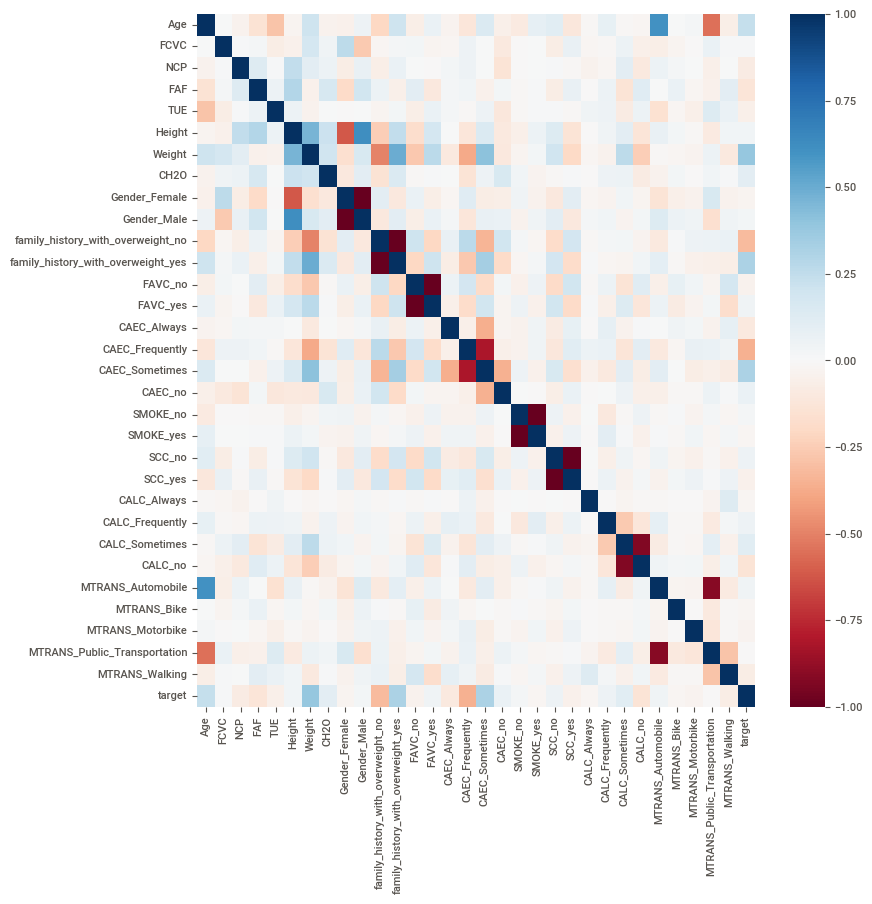

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pig_scaled['NObeyesdad'] = label_encoder.fit_transform(pig_scaled['NObeyesdad'])
X_features_ohe['target'] = pig_scaled['NObeyesdad']  # y는 target 변수 (예: 'NObeyesdad')
correlation_matrix = X_features_ohe.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, cmap='RdBu', annot=False, vmin=-1, vmax=1)
plt.show()


In [7]:
report = sv.analyze(X_features_ohe, pairwise_analysis='off')
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 데이터 준비
X = X_features_ohe  # 피처
y = pig_scaled['NObeyesdad']  # 타겟

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 개별 모델 정의
dt_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,min_samples_split=5, random_state=156)
rf_clf = RandomForestClassifier(random_state=156, max_depth=8, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=200)
gb_model = GradientBoostingClassifier(learning_rate= 0.03, max_depth= 3, min_samples_split= 2, n_estimators= 200, subsample= 0.8, random_state=156)

# 하드 보팅 분류기
hard_voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt_clf),
    ('rf_clf', rf_clf),
    ('gb_model',gb_model)
], voting='hard')  # 하드 보팅

# 소프트 보팅 분류기
soft_voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt_clf),
    ('rf_clf', rf_clf),
    ('gb_model',gb_model)
], voting='soft')  # 소프트 보팅

# 모델 훈련
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# 예측
y_pred_hard = hard_voting_clf.predict(X_test)

y_pred_soft = soft_voting_clf.predict(X_test)
y_pred_soft_proba = soft_voting_clf.predict_proba(X_test)

y_pred_gb = gb_model.predict(X_test)
y_pred_gb_proba = gb_model.predict_proba(X_test)

y_pred_rf = rf_clf.predict(X_test)
y_pred_rf_proba = rf_clf.predict_proba(X_test)

y_pred_dt = dt_clf.predict(X_test)
y_pred_dt_proba = dt_clf.predict_proba(X_test)


# 정확도 평가
accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

print(f"Hard Voting Accuracy: {accuracy_hard:.4f}")
print(f"Soft Voting Accuracy: {accuracy_soft:.4f}")


Hard Voting Accuracy: 1.0000
Soft Voting Accuracy: 1.0000


In [10]:
#  정확도 평가 함수 정의
def get_clf_eval(y_test, Pred, Pred_proba=None):
    confusion = confusion_matrix(y_test, Pred)
    accuracy = accuracy_score(y_test, Pred)
    precision = precision_score(y_test, Pred, average='macro')  # 다중 클래스에 대해 'macro'로 설정
    recall = recall_score(y_test, Pred, average='macro')  # 다중 클래스에 대해 'macro'로 설정
    f1 = f1_score(y_test, Pred, average='macro')  # 다중 클래스에 대해 'macro'로 설정
    print('오차행렬:')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
# 모델 평가
print("--소프트 보팅 모델평가--")
get_clf_eval(y_test, y_pred_soft, Pred_proba=y_pred_soft_proba)
print("\n\n--GB 모델평가--")
get_clf_eval(y_test, y_pred_gb, Pred_proba=y_pred_gb_proba)
print("\n\n--랜덤 포레스트 모델평가--")
get_clf_eval(y_test, y_pred_rf, Pred_proba=y_pred_rf_proba)
print("\n\n--결정트리 모델평가--")
get_clf_eval(y_test, y_pred_dt, Pred_proba=y_pred_dt_proba)

--소프트 보팅 모델평가--
오차행렬:
[[56  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0 50]]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, F1:1.0000


--GB 모델평가--
오차행렬:
[[56  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0 50]]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, F1:1.0000


--랜덤 포레스트 모델평가--
오차행렬:
[[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]
정확도:0.9929, 정밀도:0.9937, 재현율:0.9924, F1:0.9930


--결정트리 모델평가--
오차행렬:
[[56  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0 50]]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, F1:1.0000


In [11]:
# # 모델 중요도 확인
importances_gb = gb_model.feature_importances_
print("Gradient Boosting - Feature Importances:")
for feature, importance in zip(X_features.columns, importances_gb):
    print(f"{feature}: {importance:.4f}")
    
importances_rf = rf_clf.feature_importances_
print("\n\nRandom Forest - Feature Importances:")
for feature, importance in zip(X_features.columns, importances_rf):
    print(f"{feature}: {importance:.4f}")
    
importances_dt = dt_clf.feature_importances_
print("\n\nDecision Tree - Feature Importances:")
for feature, importance in zip(X_features.columns, importances_dt):
    print(f"{feature}: {importance:.4f}")

Gradient Boosting - Feature Importances:
Gender: 0.0000
Age: 0.0001
family_history_with_overweight: 0.0003
FAVC: 0.0000
FCVC: 0.0000
NCP: 0.0004
CAEC: 0.1156
SMOKE: 0.0061
SCC: 0.0285
FAF: 0.0168
TUE: 0.0000
CALC: 0.0000
MTRANS: 0.0000
Height: 0.0000
Weight: 0.0000
CH2O: 0.0000


Random Forest - Feature Importances:
Gender: 0.0525
Age: 0.0334
family_history_with_overweight: 0.0177
FAVC: 0.0211
FCVC: 0.0085
NCP: 0.0464
CAEC: 0.2335
SMOKE: 0.0227
SCC: 0.0402
FAF: 0.0353
TUE: 0.0234
CALC: 0.0240
MTRANS: 0.0071
Height: 0.0063
Weight: 0.0015
CH2O: 0.0155


Decision Tree - Feature Importances:
Gender: 0.0000
Age: 0.0000
family_history_with_overweight: 0.0000
FAVC: 0.0000
FCVC: 0.0000
NCP: 0.0000
CAEC: 0.0000
SMOKE: 0.0000
SCC: 0.0000
FAF: 0.0000
TUE: 0.0000
CALC: 0.0000
MTRANS: 0.0000
Height: 0.0000
Weight: 0.0000
CH2O: 0.0000


In [12]:
#각 Obesity Level에서 피처의 중요도 조사
pig_imp = pig.drop(columns=['Age', 'Height', 'Weight'])
pig_imp['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [13]:
pig_imp

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


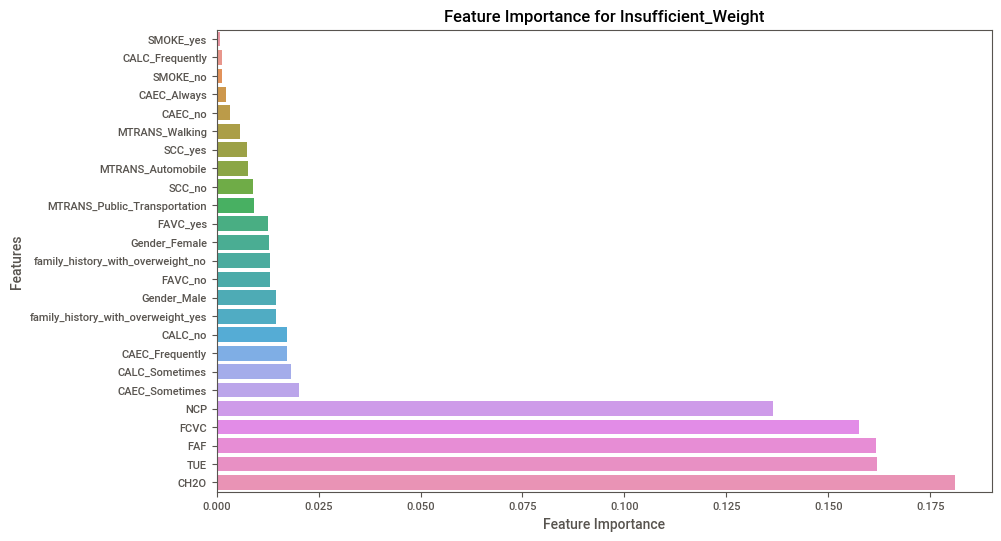

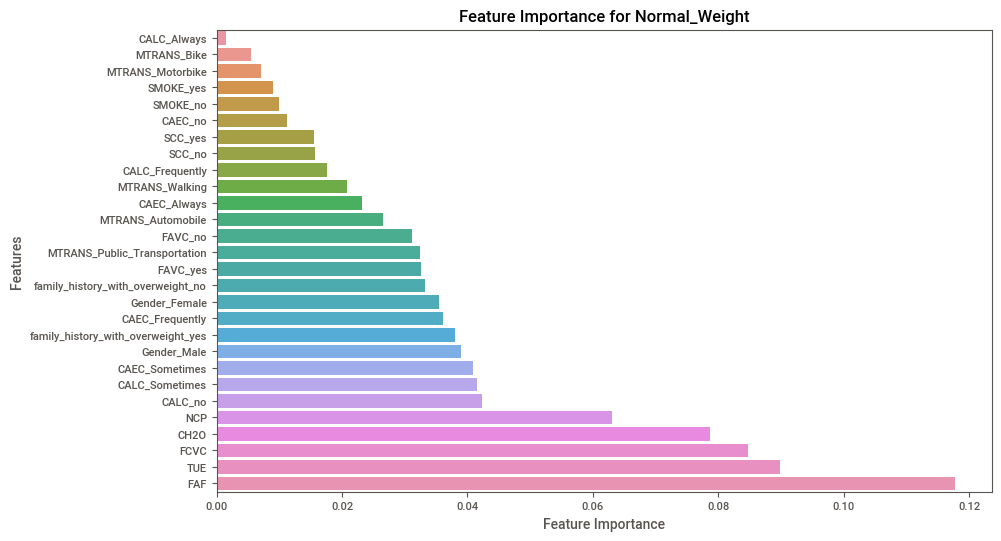

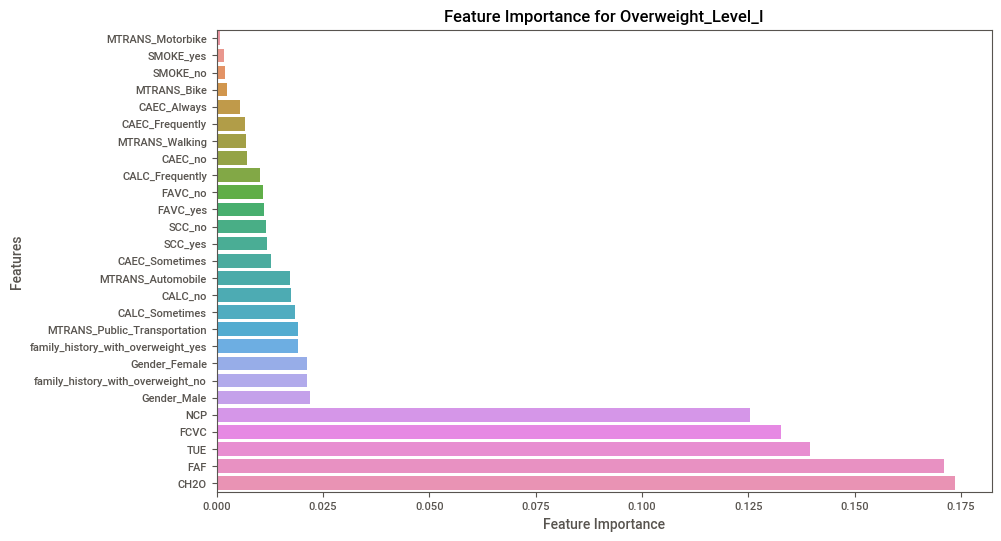

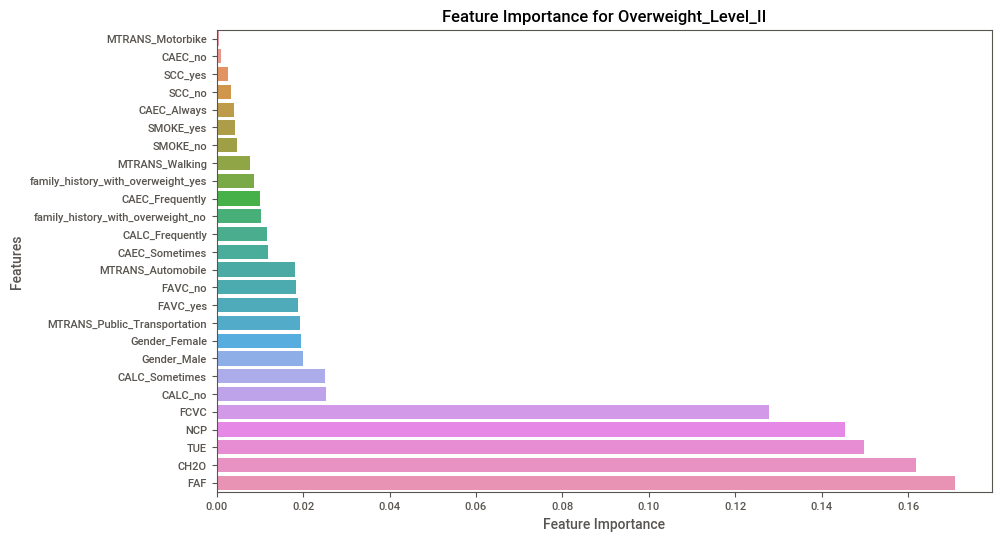

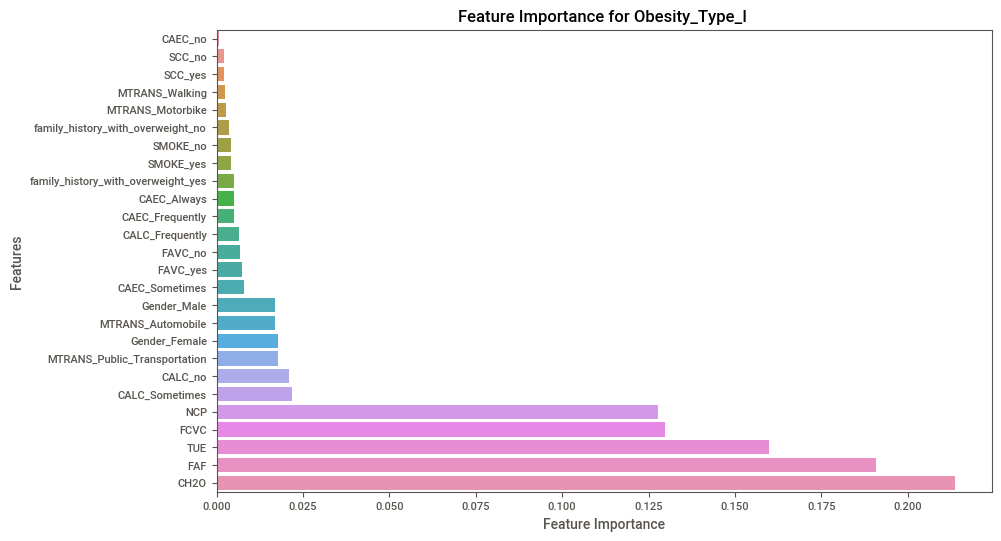

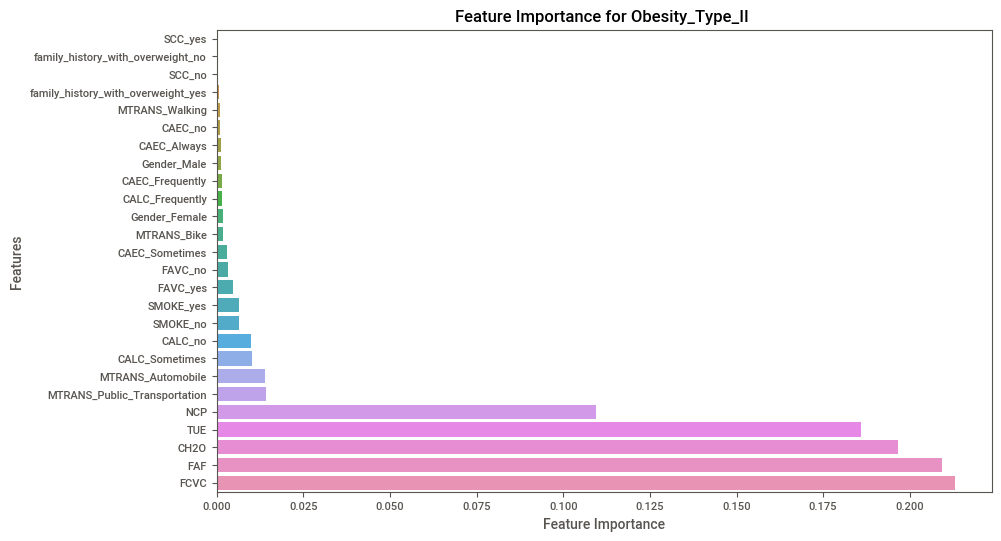

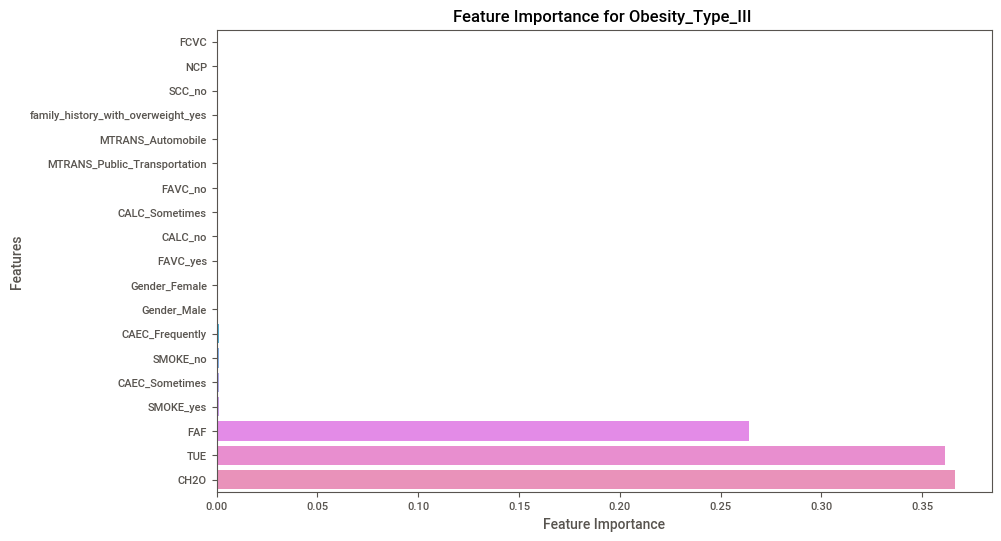

In [14]:
#비만도 별 데이터 분리
level_0_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Insufficient_Weight'].drop(columns='NObeyesdad'))
level_1_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Normal_Weight'].drop(columns='NObeyesdad'))
level_2_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Overweight_Level_I'].drop(columns='NObeyesdad'))
level_3_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Overweight_Level_II'].drop(columns='NObeyesdad'))
level_4_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Obesity_Type_I'].drop(columns='NObeyesdad'))
level_5_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Obesity_Type_II'].drop(columns='NObeyesdad'))
level_6_ohe = pd.get_dummies(pig_imp[pig_imp['NObeyesdad'] == 'Obesity_Type_III'].drop(columns='NObeyesdad'))

#한 비만도 그룹에 대한 피처 중요도 분석 함수
def plot_feature_importance_for_group(data, title):
    X = data
    y = data.index

#랜덤 포레스트 모델 학습
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X, y)

#피처 중요도 추출
    feature_importances = rf_clf.feature_importances_
    feature_names = X.columns

#중요도를 기준으로 정렬
    sorted_idx = feature_importances.argsort()

#중요도 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {title}')
    plt.show()
    
# 각 비만도 그룹에 대한 피처 중요도 표시
plot_feature_importance_for_group(level_0_ohe, 'Insufficient_Weight')
plot_feature_importance_for_group(level_1_ohe, 'Normal_Weight')
plot_feature_importance_for_group(level_2_ohe, 'Overweight_Level_I')
plot_feature_importance_for_group(level_3_ohe, 'Overweight_Level_II')
plot_feature_importance_for_group(level_4_ohe, 'Obesity_Type_I ')
plot_feature_importance_for_group(level_5_ohe, 'Obesity_Type_II ')
plot_feature_importance_for_group(level_6_ohe, 'Obesity_Type_III ')